In [1]:
import pandas as pd
import matplotlib . pyplot as plt
import seaborn as sns
import numpy as np

 BUSINESS PROBLEMS

In [55]:
## 1- WHICH CATEGORY BUY MORE BY QUANTITY AND MONETRY
## 2- WHICH OF THE PRODUCT BRAND SELL MORE
## 3-WHAT IS THE IMPACT ON SALE WITH DISCOUNTS,SHIPPING COST AND TAXES
## 4- MAKE RFM
## 5-DELIVERD AND CANCELED PRODUCT STATUS

In [3]:
df=pd.read_csv("Amazon.csv")

In [4]:
df.head()

,OrderID,OrderDate,CustomerID,CustomerName,ProductID,ProductName,Category,Brand,Quantity,UnitPrice,Discount,Tax,ShippingCost,TotalAmount,PaymentMethod,OrderStatus,City,State,Country,SellerID
0,ORD0000001,2023-01-31,CUST001504,Vihaan Sharma,P00014,Drone Mini,Books,BrightLux,3,106.59,0.00,0.00,0.09,319.86,Debit Card,Delivered,Washington,DC,India,SELL01967
1,ORD0000002,2023-12-30,CUST000178,Pooja Kumar,P00040,Microphone,Home & Kitchen,UrbanStyle,1,251.37,0.05,19.10,1.74,259.64,Amazon Pay,Delivered,Fort Worth,TX,United States,SELL01298
2,ORD0000003,2022-05-10,CUST047516,Sneha Singh,P00044,Power Bank 20000mAh,Clothing,UrbanStyle,3,35.03,0.10,7.57,5.91,108.06,Debit Card,Delivered,Austin,TX,United States,SELL00908
3,ORD0000004,2023-07-18,CUST030059,Vihaan Reddy,P00041,Webcam Full HD,Home & Kitchen,Zenith,5,33.58,0.15,11.42,5.53,159.66,Cash on Delivery,Delivered,Charlotte,NC,India,SELL01164
4,ORD0000005,2023-02-04,CUST048677,Aditya Kapoor,P00029,T-Shirt,Clothing,KiddoFun,2,515.64,0.25,38.67,9.23,821.36,Credit Card,Cancelled,San Antonio,TX,Canada,SELL01411


DATA CLEANING

In [5]:
df.shape

(100000, 20)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 20 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   OrderID        100000 non-null  object 
 1   OrderDate      100000 non-null  object 
 2   CustomerID     100000 non-null  object 
 3   CustomerName   100000 non-null  object 
 4   ProductID      100000 non-null  object 
 5   ProductName    100000 non-null  object 
 6   Category       100000 non-null  object 
 7   Brand          100000 non-null  object 
 8   Quantity       100000 non-null  int64  
 9   UnitPrice      100000 non-null  float64
 10  Discount       100000 non-null  float64
 11  Tax            100000 non-null  float64
 12  ShippingCost   100000 non-null  float64
 13  TotalAmount    100000 non-null  float64
 14  PaymentMethod  100000 non-null  object 
 15  OrderStatus    100000 non-null  object 
 16  City           100000 non-null  object 
 17  State          100000 non-null

In [7]:
df["OrderDate"]=pd.to_datetime(df["OrderDate"])

In [8]:
df["OrderDate"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 100000 entries, 0 to 99999
Series name: OrderDate
Non-Null Count   Dtype         
--------------   -----         
100000 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 781.4 KB


In [9]:
df.isna().sum()

OrderID          0
OrderDate        0
CustomerID       0
CustomerName     0
ProductID        0
ProductName      0
Category         0
Brand            0
Quantity         0
UnitPrice        0
Discount         0
Tax              0
ShippingCost     0
TotalAmount      0
PaymentMethod    0
OrderStatus      0
City             0
State            0
Country          0
SellerID         0
dtype: int64

In [10]:
df[["CustomerID" ,"OrderID"]].duplicated().any()

np.False_

In [11]:
for i in df.columns:
    print(i)
    print(df[i].unique())

OrderID
['ORD0000001' 'ORD0000002' 'ORD0000003' ... 'ORD0099998' 'ORD0099999'
 'ORD0100000']
OrderDate
<DatetimeArray>
['2023-01-31 00:00:00', '2023-12-30 00:00:00', '2022-05-10 00:00:00',
 '2023-07-18 00:00:00', '2023-02-04 00:00:00', '2022-12-31 00:00:00',
 '2024-09-20 00:00:00', '2022-11-10 00:00:00', '2024-06-26 00:00:00',
 '2020-05-01 00:00:00',
 ...
 '2021-06-28 00:00:00', '2021-01-28 00:00:00', '2023-11-22 00:00:00',
 '2020-06-26 00:00:00', '2022-12-11 00:00:00', '2022-11-23 00:00:00',
 '2021-06-22 00:00:00', '2020-08-27 00:00:00', '2023-08-23 00:00:00',
 '2022-12-20 00:00:00']
Length: 1825, dtype: datetime64[ns]
CustomerID
['CUST001504' 'CUST000178' 'CUST047516' ... 'CUST011195' 'CUST005627'
 'CUST031254']
CustomerName
['Vihaan Sharma' 'Pooja Kumar' 'Sneha Singh' 'Vihaan Reddy'
 'Aditya Kapoor' 'Karan Sharma' 'Aarav Verma' 'Rohit Kumar' 'Aman Kapoor'
 'Aarav Reddy' 'Rohit Reddy' 'Karan Kumar' 'Simran Kapoor' 'Pooja Sharma'
 'Mohit Mehta' 'Anjali Gupta' 'Arjun Kumar' 'Anjali Ver

In [12]:
df.nunique()

OrderID          100000
OrderDate          1825
CustomerID        43233
CustomerName        200
ProductID            50
ProductName          50
Category              6
Brand                10
Quantity              5
UnitPrice         48433
Discount              7
Tax               23002
ShippingCost       1501
TotalAmount       79208
PaymentMethod         6
OrderStatus           5
City                 20
State                13
Country               5
SellerID           1999
dtype: int64

In [70]:
df.describe(include="all")

,OrderID,OrderDate,CustomerID,CustomerName,ProductID,ProductName,Category,Brand,Quantity,UnitPrice,Discount,Tax,ShippingCost,TotalAmount,PaymentMethod,OrderStatus,City,State,Country,SellerID
count,100000,100000,100000,100000,100000,100000,100000,100000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000,100000,100000,100000,100000,100000
unique,100000,NaN,43233,200,50,50,6,10,NaN,NaN,NaN,NaN,NaN,NaN,6,5,20,13,5,1999
top,ORD0099984,NaN,CUST037103,Karan Joshi,P00019,LED Desk Lamp,Electronics,ReadMore,NaN,NaN,NaN,NaN,NaN,NaN,Credit Card,Delivered,Charlotte,TX,United States,SELL01099
freq,1,NaN,10,556,2098,2098,16853,10204,NaN,NaN,NaN,NaN,NaN,NaN,35038,74628,5110,24896,70058,78
mean,NaN,2022-06-30 23:55:49.440000,NaN,NaN,NaN,NaN,NaN,NaN,3.001400,302.905748,0.074226,68.468902,7.406660,918.256479,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,2020-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,5.000000,0.000000,0.000000,0.000000,4.270000,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,2021-04-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,154.190000,0.000000,15.920000,3.680000,340.890000,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,2022-07-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,303.070000,0.050000,45.250000,7.300000,714.315000,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,2023-09-29 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,451.500000,0.100000,96.060000,11.150000,1349.765000,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,2024-12-29 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,599.990000,0.300000,538.460000,15.000000,3534.980000,NaN,NaN,NaN,NaN,NaN,NaN


 WHAT I CHECKED
 
1-SHAPE AND INFO-- FROM INFO ORDERDATE IS NOT IN DATETIME FORMATE

2-FINDING THE NULL VALUE--NO NULL VALUES

3-FINDING THE DUPLICATES-- NO DUPLICATES

4-FINDING THEB MISSSPELED VALUES -NOT FOUND

5-CHECK UNIQUE VALUES OF DATA

6-THERE IS NO OUTLIERS 

NOW DATAFRAME IS READY TO ANALYSE 


ANSWERING THE PROBLEM STAMENTS ONE BY ONE

In [13]:
## 1- WHICH CATEGORY BUY MORE BY QUANTITY AND MONETRY

In [14]:
category=df.groupby("Category").agg(QUANTITY=("Quantity","count"),MONETRY=("TotalAmount","sum"))

In [15]:
category.head(6).sort_values(by="MONETRY",ascending=False)

,QUANTITY,MONETRY
Category,,
Electronics,16853,15584217.18
Sports & Outdoors,16804,15345571.88
Books,16752,15261837.01
Clothing,16439,15253397.50
Toys & Games,16542,15216684.99
Home & Kitchen,16610,15163939.36


In [16]:
df["Category"].nunique()

6

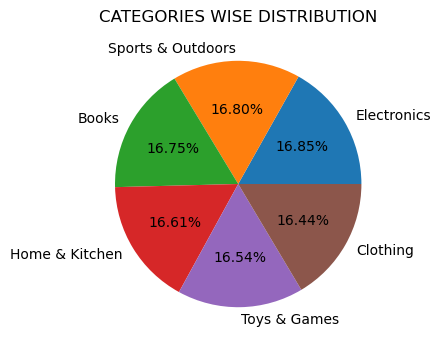

In [17]:
plt.figure(figsize=(4,4))
plt.pie(df["Category"].value_counts(),labels=df["Category"].value_counts().index,autopct="%.2f%%")
plt.title("CATEGORIES WISE DISTRIBUTION")
plt.show()

In [18]:
## insights -- they mostly sold in nearly same quantity and total price

In [19]:
#PROBLEM-2
## 2- WHICH OF THE PRODUCT BRAND SELL MORE

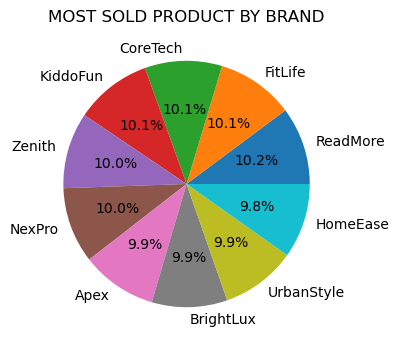

In [20]:
plt.figure(figsize=(4,4))
plt.pie(df["Brand"].value_counts(),labels=df["Brand"].value_counts().index,autopct="%1.1f%%")
plt.title("MOST SOLD PRODUCT BY BRAND")
plt.show()

In [21]:
brand_wise_calculation=df.groupby("Brand").agg(TOTAL_PRICE=("TotalAmount","sum"),TOTAL_QUANTITIES=("Quantity","count"))

In [22]:
brand_wise_calculation.sort_values(by="TOTAL_PRICE",ascending=False).head(10)

,TOTAL_PRICE,TOTAL_QUANTITIES
Brand,,
CoreTech,9343720.59,10127
KiddoFun,9324749.55,10077
ReadMore,9278406.63,10204
UrbanStyle,9249027.45,9854
Zenith,9239960.39,9990
Apex,9147604.72,9937
NexPro,9078824.97,9962
FitLife,9061444.68,10147
BrightLux,9056816.11,9907


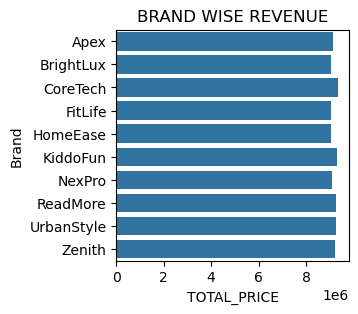

In [23]:
plt.figure(figsize=(3,3))
sns.barplot(data=brand_wise_calculation,x="TOTAL_PRICE",y="Brand")
plt.title("BRAND WISE REVENUE")
plt.show()

In [24]:
pd.pivot_table(data=df,index="Brand",values="Quantity",columns="Category",aggfunc="count")

Category,Books,Clothing,Electronics,Home & Kitchen,Sports & Outdoors,Toys & Games
Brand,,,,,,
Apex,1685,1656,1678,1567,1719,1632
BrightLux,1692,1610,1656,1673,1648,1628
CoreTech,1746,1659,1705,1624,1669,1724
FitLife,1757,1700,1698,1631,1718,1643
HomeEase,1611,1604,1670,1650,1637,1623
KiddoFun,1668,1639,1701,1685,1710,1674
NexPro,1663,1630,1702,1690,1633,1644
ReadMore,1644,1654,1692,1747,1730,1737
UrbanStyle,1642,1640,1671,1646,1679,1576


In [25]:
## all brand sold nearly equal ammount of products

In [26]:
df.head()

,OrderID,OrderDate,CustomerID,CustomerName,ProductID,ProductName,Category,Brand,Quantity,UnitPrice,Discount,Tax,ShippingCost,TotalAmount,PaymentMethod,OrderStatus,City,State,Country,SellerID
0,ORD0000001,2023-01-31,CUST001504,Vihaan Sharma,P00014,Drone Mini,Books,BrightLux,3,106.59,0.00,0.00,0.09,319.86,Debit Card,Delivered,Washington,DC,India,SELL01967
1,ORD0000002,2023-12-30,CUST000178,Pooja Kumar,P00040,Microphone,Home & Kitchen,UrbanStyle,1,251.37,0.05,19.10,1.74,259.64,Amazon Pay,Delivered,Fort Worth,TX,United States,SELL01298
2,ORD0000003,2022-05-10,CUST047516,Sneha Singh,P00044,Power Bank 20000mAh,Clothing,UrbanStyle,3,35.03,0.10,7.57,5.91,108.06,Debit Card,Delivered,Austin,TX,United States,SELL00908
3,ORD0000004,2023-07-18,CUST030059,Vihaan Reddy,P00041,Webcam Full HD,Home & Kitchen,Zenith,5,33.58,0.15,11.42,5.53,159.66,Cash on Delivery,Delivered,Charlotte,NC,India,SELL01164
4,ORD0000005,2023-02-04,CUST048677,Aditya Kapoor,P00029,T-Shirt,Clothing,KiddoFun,2,515.64,0.25,38.67,9.23,821.36,Credit Card,Cancelled,San Antonio,TX,Canada,SELL01411


In [27]:
## PROBLEM-3
## 3-WHAT IS THE IMPACT ON SALE WITH DISCOUNTS,SHIPPING COST AND TAXES

In [28]:
impact=df[["Quantity","TotalAmount","Discount","Tax","ShippingCost"]].corr()

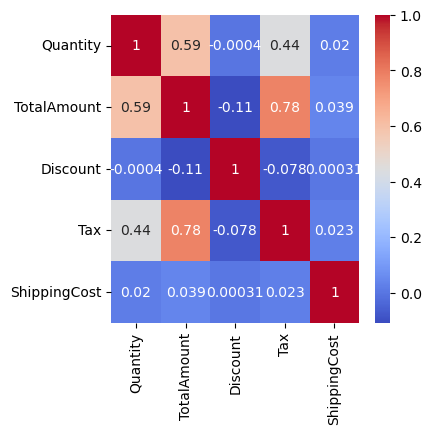

In [29]:
plt.figure(figsize=(4,4,))
sns.heatmap(impact, cmap="coolwarm", annot=True)
plt.show()

In [30]:
### if discount incrase the value of Quantity and TotalAmount is slighty or non impactfuly decrease because they have weak neg correlation with discount
## tax and quantity have moderate positive corr, it means if more buy more tax values and same for total ammount
## shipping cost impact is minimul on both but it is weak positive

In [31]:
## PROBLEM -4
## RFM

In [32]:
rfm=df.groupby("CustomerID").agg(lat_order=("OrderDate","max"),FREQUENCY=("CustomerID", "count"),MONETRY=("TotalAmount","sum"))

In [33]:
rfm.sort_values(by="FREQUENCY",ascending=False).head(5)

,lat_order,FREQUENCY,MONETRY
CustomerID,,,
CUST037103,2024-12-11,10,7467.53
CUST023748,2024-11-05,10,15215.79
CUST034288,2024-07-30,9,7391.20
CUST048737,2023-12-22,9,10125.53
CUST031337,2023-11-20,9,5292.59


In [34]:
today=pd.to_datetime("2025-12-24")
rfm["RECENCY"]=(today-rfm["lat_order"]).dt.days

In [35]:
rfm.head()

,lat_order,FREQUENCY,MONETRY,RECENCY
CustomerID,,,,
CUST000001,2024-07-26,1,446.48,516
CUST000002,2022-02-01,3,1389.93,1422
CUST000003,2020-12-28,1,1116.91,1822
CUST000004,2024-06-17,3,2660.06,555
CUST000005,2023-03-31,1,1089.56,999


In [36]:
rfm["M"]=pd.qcut(rfm["MONETRY"],q=5,labels=[1,2,3,4,5])
rfm["F"]=pd.qcut(rfm["FREQUENCY"],q=3,labels=[1,2,3],duplicates="drop")
rfm["R"]=pd.qcut(rfm["RECENCY"],q=5,labels=[5,4,3,2,1])

In [37]:
rfm.head()

,lat_order,FREQUENCY,MONETRY,RECENCY,M,F,R
CustomerID,,,,,,,
CUST000001,2024-07-26,1,446.48,516,1,1,5
CUST000002,2022-02-01,3,1389.93,1422,2,2,2
CUST000003,2020-12-28,1,1116.91,1822,2,1,1
CUST000004,2024-06-17,3,2660.06,555,4,2,4
CUST000005,2023-03-31,1,1089.56,999,2,1,3


In [52]:
rfm["Segment"]=np.where(((rfm["R"]>=4)&(rfm["F"]>2)&(rfm["M"]>=4)),"Champions",None)
rfm["Segment"]=np.where(((rfm["R"]>=2)&(rfm["F"]>2)),"Loyal Customers",rfm["Segment"])
rfm["Segment"]=np.where(((rfm["R"]>=4)&(rfm["F"]==2)),"Potential Loyalist",rfm["Segment"])
rfm["Segment"]=np.where(((rfm["R"]<=2)&(rfm["F"]==1)),"AT Risk",rfm["Segment"])
rfm["Segment"]=np.where(((rfm["R"]==1)&(rfm["F"]==2)&(rfm["M"]<=2)),"lost",rfm["Segment"])
rfm["Segment"]=np.where(((rfm["R"].isin([3,4]))&(rfm["F"].isin([2,3]))&(rfm["M"]>=4)),"Big Spenders",rfm["Segment"])
rfm["Segment"]=rfm["Segment"].fillna("Others")

In [53]:
rfm.head()

,lat_order,FREQUENCY,MONETRY,RECENCY,M,F,R,Segment
CustomerID,,,,,,,,
CUST000001,2024-07-26,1,446.48,516,1,1,5,AT Risk
CUST000002,2022-02-01,3,1389.93,1422,2,2,2,Potential Loyalist
CUST000003,2020-12-28,1,1116.91,1822,2,1,1,Others
CUST000004,2024-06-17,3,2660.06,555,4,2,4,Big Spenders
CUST000005,2023-03-31,1,1089.56,999,2,1,3,AT Risk


In [54]:
rfm["Segment"].value_counts()

Segment
AT Risk               19186
Others                13182
Big Spenders           5902
Potential Loyalist     3858
Loyal Customers        1023
lost                     82
Name: count, dtype: int64

In [51]:
OTHER_PERCENTAGE=((rfm["Segment"]=="Others").sum()/rfm["Segment"].count())*100
print("PERCENTAGE OF OTHER", ":", OTHER_PERCENTAGE, "%")

PERCENTAGE OF OTHER : 30.4905974602734 %


In [56]:
## PROBLEM -5
## 5-DELIVERD AND CANCELED PRODUCT STATUS

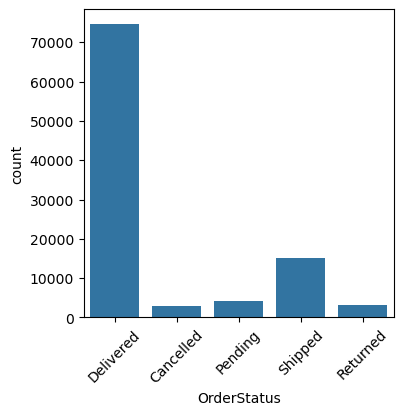

In [65]:
plt.figure(figsize=(4,4))
sns.countplot(x=df["OrderStatus"])
plt.xticks(rotation=45)
plt.show()

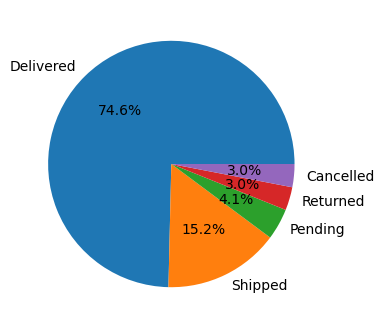

In [68]:
plt.figure(figsize=(4,4))
plt.pie(df["OrderStatus"].value_counts(),labels=df["OrderStatus"].value_counts().index,autopct="%1.1f%%")
plt.show()

In [69]:
## mostly product delivered

 MAIN INSIGHTS FROM ANALYSIS

 1- they mostly sold in nearly same quantity and total price BY CATEGORY

 2- all brand sold nearly equal ammount of products

 3- A- if discount incrase the value of Quantity and TotalAmount is slighty or non impactfuly decrease because they have weak neg correlation with discount
 
    B-tax and quantity have moderate positive corr, it means if more buy more tax values and same for total ammount
    
    C-shipping cost impact is minimul on both but it is weak positive

 4- BUILD THE RFM AND MAKEED SEGMENTS

 5-mostly product delivered